# Question 1: Missing Data
Investigate the missing data in this dataset. Specifically, for each of the following variables that have missing data, decide if any imputation is possible. Give your reasoning and code if you decide to impute missing values.
- Columns for investigation: CARRIER, CARRIER_NAME, MANUFACTURE_YEAR, NUMBER_OF_SEATS, CAPACITY_IN_POUNDS, and AIRLINE_ID.
- For example, watch out for "North American Airlines" aircrafts. Are the CARRIER/UNIQUE_CARRIER column really missing?

In [15]:
import pandas as pd
inventory = pd.read_csv('sample_data/T_F41SCHEDULE_B43 (1).zip')

<ipython-input-15-545943f08269>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  inventory = pd.read_csv('sample_data/T_F41SCHEDULE_B43 (1).zip')


In [16]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132264 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

In [17]:
inventory.describe()

,YEAR,MANUFACTURE_YEAR,NUMBER_OF_SEATS,CAPACITY_IN_POUNDS,AIRLINE_ID
count,132313.000000,132310.000000,132306.000000,132212.000000,132208.000000
mean,2014.657706,2000.399992,110.619859,71313.508131,20051.606559
std,5.270037,39.630346,77.424860,87093.991985,380.917190
min,2006.000000,0.000000,0.000000,0.000000,19386.000000
25%,2010.000000,1995.000000,50.000000,34446.000000,19805.000000
50%,2015.000000,2001.000000,125.000000,43400.000000,19977.000000
75%,2019.000000,2007.000000,160.000000,82012.000000,20366.000000
max,2023.000000,2756.000000,737.000000,875000.000000,22085.000000


In [18]:
# no exact duplicates
inventory.duplicated().sum()

np.int64(0)

In [19]:
# count of missing data by column
missing_data = inventory.isnull().sum()
missing_data

,0
YEAR,0
CARRIER,49
CARRIER_NAME,105
MANUFACTURE_YEAR,3
UNIQUE_CARRIER_NAME,105
SERIAL_NUMBER,0
TAIL_NUMBER,0
AIRCRAFT_STATUS,0
OPERATING_STATUS,0
NUMBER_OF_SEATS,7


In [20]:
# investigate carrier --> carrier is null for north american airlines.
# All null are north american airlines
inventory[inventory['CARRIER'].isnull()]

# Checking all north american airlines flights, we can see
# that it is sometimes logged as NA and sometimes as NaN,
# leading me to believe that NA was sometimes mistaken as NaN
inventory.loc[inventory['CARRIER_NAME'] == 'North American Airlines']


# I believe NaN carrier name for north american airlines should be corrected to NA
inventory.loc[inventory['CARRIER'].isnull(), ['CARRIER', 'UNIQUE_CARRIER']] = ["NA", "NA"]

In [21]:
inventory[inventory['CARRIER']== "L4"]['UNIQUE_CARRIER'].value_counts()

,count
UNIQUE_CARRIER,
L3,10


In [22]:
# We can see carrier_name is null for carrier OH and L4
inventory[inventory['CARRIER_NAME'].isnull()]['CARRIER'].value_counts()

# When carrier is OH, carrier name is either PSA Airlines or Comair
inventory[inventory['CARRIER'] == 'OH']['CARRIER_NAME'].value_counts()

# We can find on google that Comair stopped flights in 2012 and we can see that
# most of these have year 2013, so we can set those that are OH and 2013 to PSA
# Also set airline ID unique to PSA Airlines
inventory[inventory['CARRIER_NAME'].isnull()]['YEAR'].value_counts()
inventory.loc[(inventory['CARRIER_NAME'].isnull()) &
 (inventory['CARRIER'] == "OH") & (inventory['YEAR'] == 2013), ['CARRIER_NAME', 'AIRLINE_ID', 'UNIQUE_CARRIER', 'UNIQUE_CARRIER_NAME']] = ["PSA Airlines Inc.", 20397.0, 'OH', "PSA Airlines Inc."]

# when carrier is L4, carrier name is Lynx Aviation d/b/a Frontier Airlines
inventory[inventory['CARRIER'] == 'L4']['CARRIER_NAME'].value_counts()

# The remaining 8 are of L4, and carrier name is therefore lynx
inventory.loc[(inventory['CARRIER_NAME'].isnull()) &
 (inventory['CARRIER'] == "L4"), ["CARRIER_NAME", 'AIRLINE_ID', 'UNIQUE_CARRIER', 'UNIQUE_CARRIER_NAME']] = ["Lynx Aviation d/b/a Frontier Airlines", 21217.0, "L3", "Lynx Aviation d/b/a Frontier Airlines"]

In [23]:
inventory[inventory['MANUFACTURE_YEAR'].isnull()]


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
116651,2022,5Y,Atlas Air Inc.,NaN,Atlas Air Inc.,26259,N664GT,B,Y,0.0,BOEING,8192,B747-400,0.0,1/25/2022 12:00:00 AM,20007.0,5Y
124680,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10134,N655CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124681,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10182,N690CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E


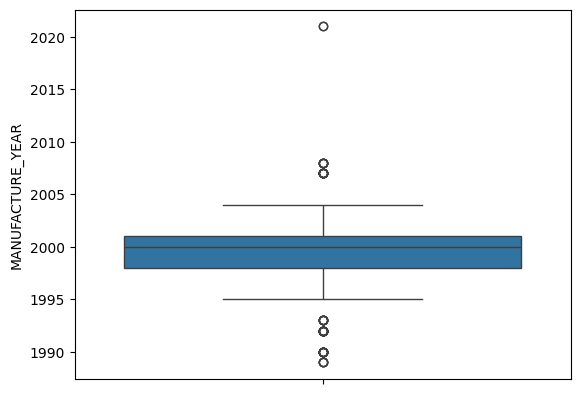

In [30]:
# The first missing manufaacturer year is of model boeing 747-400.
import seaborn as sns
sns.boxplot(inventory.loc[inventory['MODEL'] == "B747-400"]['MANUFACTURE_YEAR'])

# Filter to only existing manufacture years for the model
valid_years = inventory.loc[
    (inventory['MODEL'] == 'B747-400') &
    (inventory['MANUFACTURE_YEAR'].notna()),
    'MANUFACTURE_YEAR'
]

# Fill the missing value
inventory.loc[
    (inventory['MODEL'] == 'B747-400') &
    (inventory['MANUFACTURE_YEAR'].isna()),
    'MANUFACTURE_YEAR'
] = inventory.loc[
    (inventory['MODEL'] == 'B747-400') &
    (inventory['MANUFACTURE_YEAR'].isna()),
    'MANUFACTURE_YEAR'
].apply(lambda x: valid_years.median())

TypeError: Invalid object type at position 0

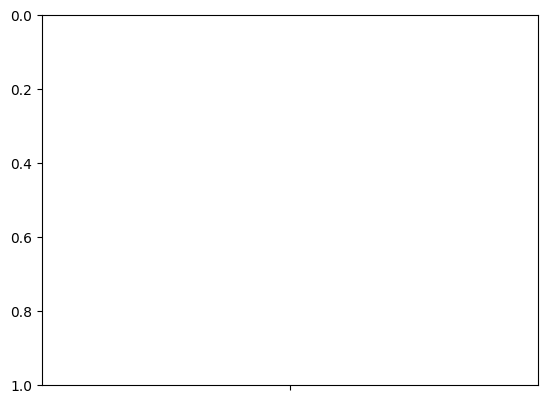

In [33]:
#IMPUTE

import seaborn as sns
sns.boxplot(inventory.loc[inventory['MODEL'] == "CL-600-2C10"]['MANUFACTURE_YEAR'])


# Filter to only existing manufacture years for the model
valid_years = inventory.loc[
    (inventory['MODEL'] == 'CL-600-2C10') &
    (inventory['MANUFACTURE_YEAR'].notna()),
    'MANUFACTURE_YEAR'
]


# Fill the missing value
inventory.loc[
    (inventory['MODEL'] == 'CL-600-2C10') &
    (inventory['MANUFACTURE_YEAR'].isna()),
    'MANUFACTURE_YEAR'
] = inventory.loc[
    (inventory['MODEL'] == 'CL-600-2C10') &
    (inventory['MANUFACTURE_YEAR'].isna()),
    'MANUFACTURE_YEAR'
].apply(lambda x: valid_years.median)

In [34]:
# All number of seats have null for this type of CARGO plane
# which has zero seats upon investigation.
inventory[inventory['NUMBER_OF_SEATS'].isnull()]
print(inventory[inventory['MODEL'] == "767-232SFCARGO"]['NUMBER_OF_SEATS'].value_counts(), '\n')
print(inventory[inventory['MODEL'] == "767-338ERCARGO"]['NUMBER_OF_SEATS'].value_counts())

# Set to zero number of seats
inventory.loc[inventory['NUMBER_OF_SEATS'].isnull(), "NUMBER_OF_SEATS"] = 0


NUMBER_OF_SEATS
0.0    25
Name: count, dtype: int64 

NUMBER_OF_SEATS
0.0    26
Name: count, dtype: int64


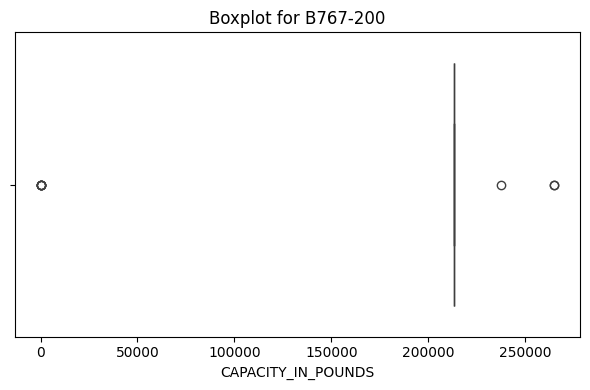

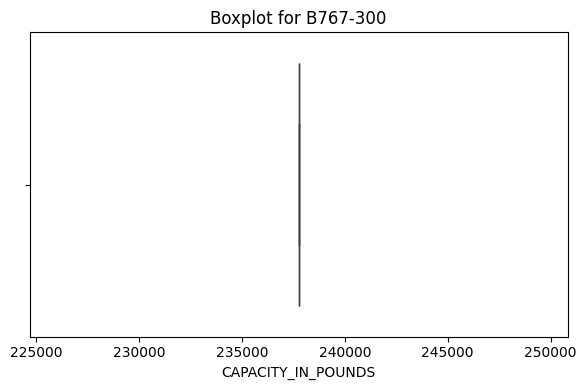

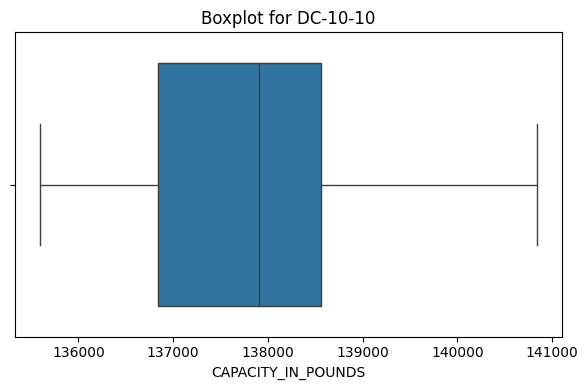

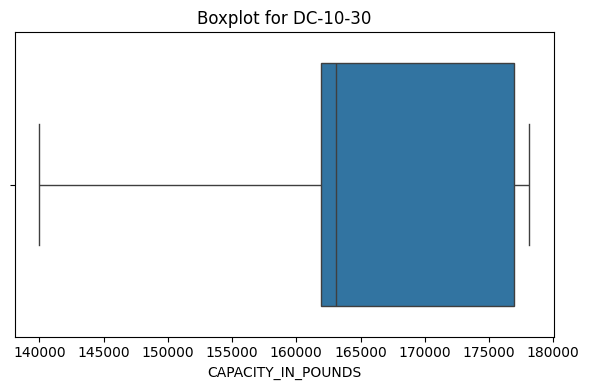

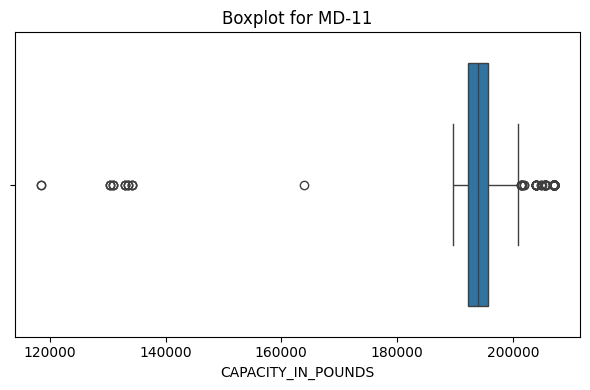

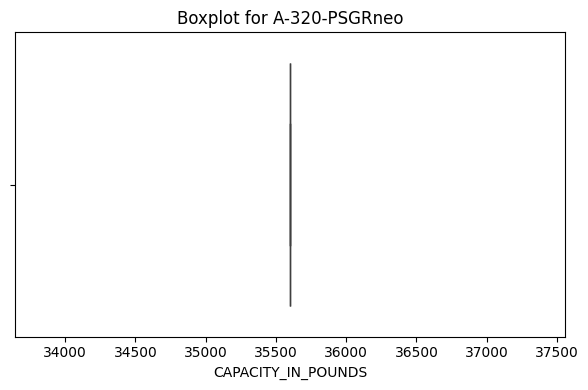

In [35]:
import matplotlib.pyplot as plt

# Loop through models with missing CAPACITY_IN_POUNDS
for model in inventory[inventory['CAPACITY_IN_POUNDS'].isnull()]['MODEL'].unique():
    plt.figure(figsize=(6, 4))  # create a new figure for each plot
    sns.boxplot(
        data=inventory[inventory['MODEL'] == model],
        x='CAPACITY_IN_POUNDS'
    )
    plt.title(f'Boxplot for {model}')
    plt.xlabel('CAPACITY_IN_POUNDS')
    plt.tight_layout()
    plt.show()


# We can see that each has a very tight IQR for weight capacity.
# Can impute sampling from that range.

In [36]:
import numpy as np
import random

# Loop through each model with missing CAPACITY_IN_POUNDS
for model in inventory[inventory['CAPACITY_IN_POUNDS'].isnull()]['MODEL'].unique():

    # Get non-null capacity values for the model
    model_data = inventory.loc[
        (inventory['MODEL'] == model) &
        (inventory['CAPACITY_IN_POUNDS'].notnull()),
        'CAPACITY_IN_POUNDS'
    ]

    # Calculate IQR
    Q1 = model_data.quantile(0.25)
    Q3 = model_data.quantile(0.75)

    # Get the indices where capacity is missing for this model
    missing_indices = inventory.loc[
        (inventory['MODEL'] == model) &
        (inventory['CAPACITY_IN_POUNDS'].isnull())
    ].index

    # Fill each missing value with a random sample from the IQR range
    for idx in missing_indices:
        inventory.at[idx, 'CAPACITY_IN_POUNDS'] = random.uniform(Q1, Q3)


# Question 2: Transformations
Inspect the columns MANUFACTURER, MODEL, AIRCRAFT_STATUS, and OPERATING_STATUS. Decide, for each column, if transformation or standardization of data are required. Give your reasoning and code if you decide to transform the data.

Hints:
- For very messy data like manufacturer/model names, give your best attempt.
- It is okay to not catch them all.
- Use value_counts() to identify "big wins".
- Break down into multiple steps, instead of having one line of code to do them all.

### First deal with manufacturer

In [37]:
# Boeing: 42% of manufactured planes.
total_boeing = 0
for manufacturer in inventory['MANUFACTURER'].unique():
  if "boeing" in manufacturer.lower():
    total_boeing += len(inventory.loc[inventory['MANUFACTURER'] == manufacturer, 'MANUFACTURER'].index)
    inventory.loc[inventory['MANUFACTURER'] == manufacturer, 'MANUFACTURER'] = "Boeing"
    print(manufacturer)

print(total_boeing/len(inventory) * 100)

BOEING
BOEING                                                                          
Boeing
THEBOEINGCOMPANY
BOEINGCO
BoeingCo
BOEINGCOMPANY
THEBOEINGCO
boeing
TheBoeingCompany
Boeing747-446
BoeingCo.
Boeing(McDonnell-Douglas)
TheBOEINGCO
56.20914044727275


In [38]:
total_bombardier = 0
for manufacturer in inventory['MANUFACTURER'].unique():
    if "bombardier" in manufacturer.lower():
          total_bombardier += len(inventory.loc[inventory['MANUFACTURER'] == manufacturer, 'MANUFACTURER'].index)
          inventory.loc[inventory['MANUFACTURER'] == manufacturer, 'MANUFACTURER'] = "Bombardier"
          print(manufacturer)

print(total_bombardier/len(inventory) * 100)

BOMBARDIER
BOMBARDIER                                                                      
Bombardier
BombardierAerospace
11.673834014798244


In [39]:
total_airbus = 0
for manufacturer in inventory['MANUFACTURER'].unique():
    if "airbus" in manufacturer.lower():
          total_airbus += len(inventory.loc[inventory['MANUFACTURER'] == manufacturer, 'MANUFACTURER'].index)
          inventory.loc[inventory['MANUFACTURER'] == manufacturer, 'MANUFACTURER'] = "Airbus"
          print(manufacturer)

print(total_airbus/len(inventory) * 100)

AIRBUS
AIRBUS                                                                          
Airbus
AIRBUSINDUSTRIES
AirbusIndustrie
AirbusIndustries
airbus
AirbusCompany
AirBlue/Airbus
23.927354077074813


In [40]:
for manufacturer in inventory['MANUFACTURER'].unique():
    if "embraer" in manufacturer.lower():
          inventory.loc[inventory['MANUFACTURER'] == manufacturer, 'MANUFACTURER'] = "Embraer"
          print(manufacturer)

EMBRAER
EMBRAER                                                                         
Embraer


In [41]:
inventory['MANUFACTURER'].value_counts()[4:]

for manufacturer in inventory['MANUFACTURER'].unique():
    if "cessna" in manufacturer.lower():
          inventory.loc[inventory['MANUFACTURER'] == manufacturer, 'MANUFACTURER'] = "Cessna"
          print(manufacturer)

CESSNA
CESSNA                                                                          
Cessna


In [42]:
inventory['MANUFACTURER'].value_counts()[5:]


for manufacturer in inventory['MANUFACTURER'].unique():
    if "mcdonnell" in manufacturer.lower() or 'douglas' in manufacturer.lower():
          inventory.loc[inventory['MANUFACTURER'] == manufacturer, 'MANUFACTURER'] = "McDonnell-Douglas"
          print(manufacturer)

MCDONNELL-DOUGLAS
MCDONNELL-DOUGLAS                                                               
Douglas
MCDONNELLDOUGLAS
McDonnellDouglas
McDonnell-Douglas
MCDONNELLDOUG
DOUGLASAIRCRAFT
DOUGLAS
McDonnelDouglas
McDonaldDouglas
MDDouglas
McDonnellDouglasMD11-F
MCDONNELL


In [43]:
for manufacturer in inventory['MANUFACTURER'].unique():
    if "canada" in manufacturer.lower():
          inventory.loc[inventory['MANUFACTURER'] == manufacturer, 'MANUFACTURER'] = "Canadair"
          print(manufacturer)

CANADAIR
CANADAIR                                                                        
Canadair


In [44]:
for manufacturer in inventory['MANUFACTURER'].unique():
    if manufacturer.lower() == 'ge' or "gecas" in manufacturer.lower():
          inventory.loc[inventory['MANUFACTURER'] == manufacturer, 'MANUFACTURER'] = "GE"
          print(manufacturer)

GE
GECAS
Hamburg/GECAS
Rossiya/GECAS
Vueling/GECAS
AerLingus/GECAS
easyJet/GECAS
Aeroflot/GECAS
GECAS/Alaska


In [45]:
for manufacturer in inventory['MANUFACTURER'].unique():
    if"dehavilland" in manufacturer.lower():
          inventory.loc[inventory['MANUFACTURER'] == manufacturer, 'MANUFACTURER'] = "DeHavilland"
          print(manufacturer)

DEHAVILLAND
DEHAVILLAND                                                                     
DeHavilland
deHavilland


In [46]:
for manufacturer in inventory['MANUFACTURER'].unique():
    if"saab" in manufacturer.lower():
          inventory.loc[inventory['MANUFACTURER'] == manufacturer, 'MANUFACTURER'] = "SAAB"
          print(manufacturer)

SAAB AIRCRAFT
SAAB AIRCRAFT                                                                   
Saab
SAAB
SAABFairchild
SAABScania
SAAB-Fairchild


In [47]:
# Fixed major airlines encompassing over 98% of inventory, good enough for me:)
print("PERCENT LEFT", round(inventory['MANUFACTURER'].value_counts()[11:].sum()/len(inventory) * 100,3))

PERCENT LEFT 1.555


### Model

In [48]:
model_inventory = inventory.copy(deep = True)

In [49]:
model_inventory['MODEL'].value_counts()

,count
MODEL,
EMB-145,2614
B-737-7H4,2470
B737-823,2370
A320-232,2333
A321-231,2259
...,...
A321-231(P2F),1
777FFX,1
T210N,1


In [50]:
import pandas as pd
import re

def standardize_model(model):
    """
    try to standardize model names, especially popular models, to format (1+ letters, 3 numbers, details)
    """
    model = str(model).upper()  # uppercase
    model = model.replace('BOEING', '').replace('AIRBUS', '')  # Sremove manufacturer names
    model = re.sub(r'[^A-Z0-9]', '', model)  # remove (dashes, spaces, slashes, etc.)

    # match any aircraft type (letters + 3 digits, followed by weird details)
    match = re.search(r'([A-Z]+[0-9]{3})([A-Z0-9]*)', model)

    if match:
        aircraft_type = match.group(1)  # e.g. B737, CL600
        details = match.group(2)        # e.g. 800, 7H4
        details = re.sub(r'(PAX|PSGR|PASSENGERONLY)', '', details)  # strip passenger det
        return f'{aircraft_type}-{details}' if details else aircraft_type

    return model  # otherwise return as is

model_inventory['MODEL_STANDARDIZED'] = model_inventory['MODEL'].apply(standardize_model)

In [51]:
import re

def extract_aircraft_family(standardized_model):
    """
    Get the generalized format from standardized
    model name, e.g. A320, B747, etc.
    """
    standardized_model = str(standardized_model).upper()

    # Match letters + 3+ digits at the start of the standardized model name
    match = re.match(r'([A-Z]+[0-9]{3,})', standardized_model)
    if match:
        return match.group(1)

    return standardized_model  # fallback if no match

model_inventory['MODEL_GENERAL'] = model_inventory['MODEL_STANDARDIZED'].apply(extract_aircraft_family)

model_inventory['MODEL_GENERAL'].value_counts()

,count
MODEL_GENERAL,
B737,20481
A320,8344
A319,5421
B757,4954
A321,4499
...,...
PREMIER,1
C206,1
GULFSTREAM150,1


### Aircraft Status

In [52]:
model_inventory['AIRCRAFT_STATUS'] = model_inventory['AIRCRAFT_STATUS'].str.upper()
model_inventory['AIRCRAFT_STATUS'].value_counts()

,count
AIRCRAFT_STATUS,
O,79506
B,43551
A,9134
L,122


### OPERATING_STATUS

In [53]:
model_inventory['OPERATING_STATUS'] = model_inventory['OPERATING_STATUS'].str.upper()
model_inventory['OPERATING_STATUS'].value_counts()

,count
OPERATING_STATUS,
Y,126648
N,5664
,1


### AIRCRAFT_TYPE

In [61]:
print(model_inventory['AIRCRAFT_TYPE'].isna().sum())

for manufacturer in model_inventory['MANUFACTURER'].unique():
    manu_df = model_inventory.loc[model_inventory['MANUFACTURER'] == manufacturer]
    if manu_df['AIRCRAFT_TYPE'].nunique() == 1:
        model_inventory.loc[model_inventory['MANUFACTURER'] == manufacturer, 'AIRCRAFT_TYPE'] = manu_df['AIRCRAFT_TYPE'].unique()[0]

print(model_inventory['AIRCRAFT_TYPE'].isna().sum())

# Can't impute using Manufacturer :(, this didn't help anything


29933
29937


## Remove data rows that still have missing values. Report the amount of remaining data you obtained.


In [65]:
model_inventory.loc[model_inventory['UNIQUE_CARRIER'].isna(), 'UNIQUE_CARRIER']= "NA"
missing_data = model_inventory.isnull().sum()
missing_data

,0
YEAR,0
CARRIER,0
CARRIER_NAME,0
MANUFACTURE_YEAR,0
UNIQUE_CARRIER_NAME,0
SERIAL_NUMBER,0
TAIL_NUMBER,0
AIRCRAFT_STATUS,0
OPERATING_STATUS,0
NUMBER_OF_SEATS,0


In [66]:
# FX doesn't put in models, those 11 NAN can't be helped.
model_inventory[model_inventory['MODEL'].isnull()]
model_inventory[model_inventory['CARRIER'] == "FX"]

# Similarly, acquisition date being unknown can't be derived from elsewhere, therefore these all have to be removed
model_inventory[model_inventory['ACQUISITION_DATE'].isnull()]
model_inventory[model_inventory['AIRCRAFT_TYPE'].isnull()]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER,MODEL_STANDARDIZED,MODEL_GENERAL
0,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7858,N202PS,B,Y,50.0,Canadair,NaN,CRJ-2/4,47000.0,10/28/2003 12:00:00 AM,20397.0,16,CRJ24,CRJ24
1,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7860,N206PS,B,Y,50.0,Canadair,NaN,CRJ-2/4,47000.0,10/30/2003 12:00:00 AM,20397.0,16,CRJ24,CRJ24
2,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7873,N207PS,B,Y,50.0,Canadair,NaN,CRJ-2/4,47000.0,11/26/2003 12:00:00 AM,20397.0,16,CRJ24,CRJ24
3,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7874,N209PS,B,Y,50.0,Canadair,NaN,CRJ-2/4,47000.0,12/4/2003 12:00:00 AM,20397.0,16,CRJ24,CRJ24
4,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7879,N213PS,B,Y,50.0,Canadair,NaN,CRJ-2/4,47000.0,12/16/2003 12:00:00 AM,20397.0,16,CRJ24,CRJ24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30553,2010,AA,American Airlines Inc.,2010.0,American Airlines Inc.,40584,N866NN,O,Y,160.0,Boeing,NaN,B737-823PASSENGER,40800.0,12/23/2010 12:00:00 AM,19805.0,AA,B737-823PASSENGER,B737
37156,2011,AA,American Airlines Inc.,1991.0,American Airlines Inc.,11353,N1402K,B,N,87.0,FOKKERAIRCRAFTUSA,NaN,FOKKERPASSENGER,22200.0,8/30/1991 12:00:00 AM,19805.0,AA,FOKKERPASSENGER,FOKKERPASSENGER
37157,2011,AA,American Airlines Inc.,1991.0,American Airlines Inc.,11354,N1403M,B,N,87.0,FOKKERAIRCRAFTUSA,NaN,FOKKERPASSENGER,22200.0,9/13/1991 12:00:00 AM,19805.0,AA,FOKKERPASSENGER,FOKKERPASSENGER
37158,2011,AA,American Airlines Inc.,1991.0,American Airlines Inc.,11355,N1404D,B,N,87.0,FOKKERAIRCRAFTUSA,NaN,FOKKERPASSENGER,22200.0,9/24/1991 12:00:00 AM,19805.0,AA,FOKKERPASSENGER,FOKKERPASSENGER


In [68]:
import pandas as pd

initial_rows = len(model_inventory)
model_inventory_clean = model_inventory.dropna()
final_rows = len(model_inventory_clean)
percent_retained = (final_rows / initial_rows) * 100

print(f"Initial rows: {initial_rows}")
print(f"Final rows: {final_rows}")
print(f"Percentage of data retained: {percent_retained:.2f}%")


Initial rows: 132313
Final rows: 101398
Percentage of data retained: 76.63%


In [38]:
model_inventory_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101402 entries, 29239 to 132312
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 101402 non-null  int64  
 1   CARRIER              101402 non-null  object 
 2   CARRIER_NAME         101402 non-null  object 
 3   MANUFACTURE_YEAR     101402 non-null  float64
 4   UNIQUE_CARRIER_NAME  101402 non-null  object 
 5   SERIAL_NUMBER        101402 non-null  object 
 6   TAIL_NUMBER          101402 non-null  object 
 7   AIRCRAFT_STATUS      101402 non-null  object 
 8   OPERATING_STATUS     101402 non-null  object 
 9   NUMBER_OF_SEATS      101402 non-null  float64
 10  MANUFACTURER         101402 non-null  object 
 11  AIRCRAFT_TYPE        101402 non-null  object 
 12  MODEL                101402 non-null  object 
 13  CAPACITY_IN_POUNDS   101402 non-null  float64
 14  ACQUISITION_DATE     101402 non-null  object 
 15  AIRLINE_ID        

## 4. Transformation and derivative variables
- For the columns NUMBER_OF_SEATS and CAPACITY_IN_POUNDS, check the skewness in the variable and plot a histogram for each variable.
- The Box-Cox transformation (scipy.stats.boxcox) is one possible way to transform variables into a "more-normal-like" variable. Apply the Box-Cox transformation for these two columns and save them as new columns, i.e. XXXXXXXXX_BOXCOX.
- Plot a histogram for each transformed variable.
- Describe what you observe before and after transformation.

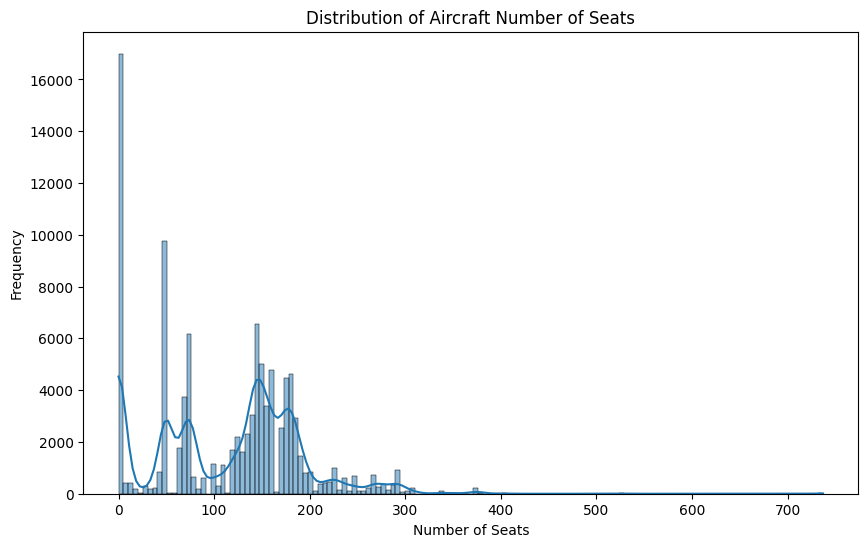

In [41]:
# histogram sns

plt.figure(figsize=(10, 6))
sns.histplot(model_inventory_clean['NUMBER_OF_SEATS'], kde=True)
plt.title('Distribution of Aircraft Number of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.show()


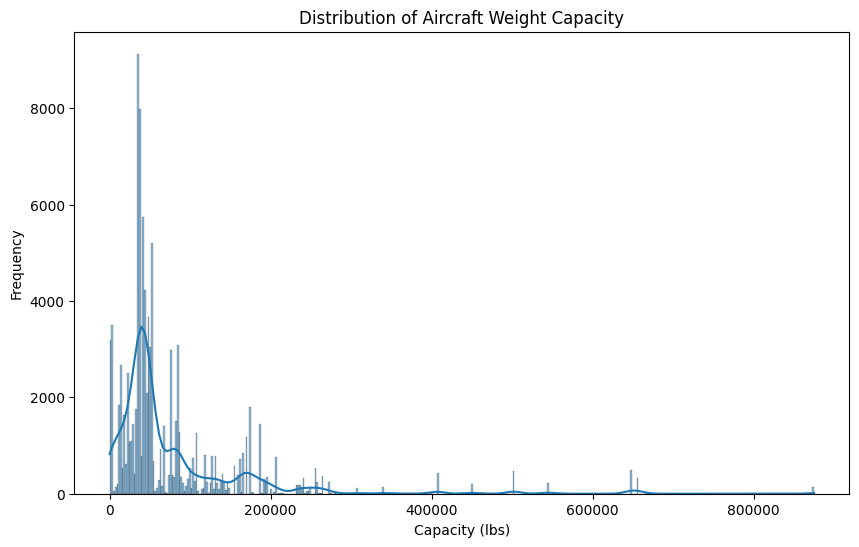

In [42]:

plt.figure(figsize=(10, 6))
sns.histplot(model_inventory_clean['CAPACITY_IN_POUNDS'], kde=True)
plt.title('Distribution of Aircraft Weight Capacity')
plt.xlabel('Capacity (lbs)')
plt.ylabel('Frequency')
plt.show()


In [45]:
model_inventory_clean['NUMBER_OF_SEATS'].dropna()

,NUMBER_OF_SEATS
29239,92.0
29240,86.0
29241,86.0
29242,136.0
29243,19.0
...,...
132308,50.0
132309,50.0
132310,50.0
132311,50.0


<ipython-input-47-64b6f6983325>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_inventory_clean['NUMBER_OF_SEATS_BOXCOX'] = transformed_seats
<ipython-input-47-64b6f6983325>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_inventory_clean['CAPACITY_IN_POUNDS_BOXCOX'] = transformed_capacity


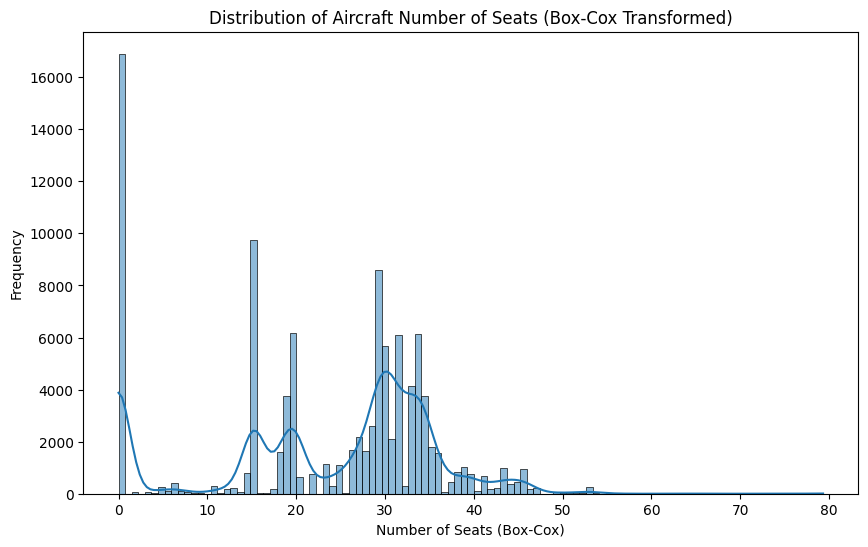

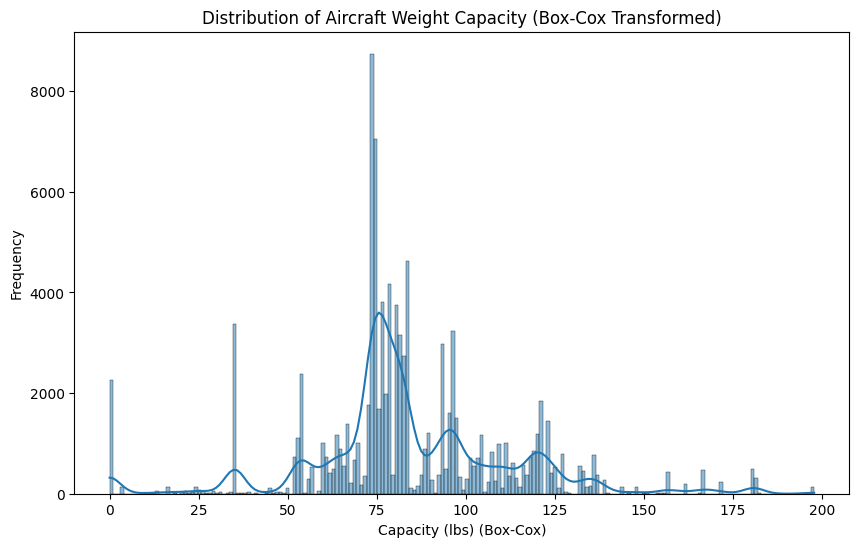

In [47]:
# boxcox

from scipy import stats

# Apply Box-Cox transformation to 'NUMBER_OF_SEATS'
transformed_seats, lambda_seats = stats.boxcox(model_inventory_clean['NUMBER_OF_SEATS'] + 1)  # Add 1 to handle zero values
model_inventory_clean['NUMBER_OF_SEATS_BOXCOX'] = transformed_seats

# Apply Box-Cox transformation to 'CAPACITY_IN_POUNDS'
transformed_capacity, lambda_capacity = stats.boxcox(model_inventory_clean['CAPACITY_IN_POUNDS'] + 1)
model_inventory_clean['CAPACITY_IN_POUNDS_BOXCOX'] = transformed_capacity

# Plot histograms of the transformed variables
plt.figure(figsize=(10, 6))
sns.histplot(model_inventory_clean['NUMBER_OF_SEATS_BOXCOX'], kde=True)
plt.title('Distribution of Aircraft Number of Seats (Box-Cox Transformed)')
plt.xlabel('Number of Seats (Box-Cox)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(model_inventory_clean['CAPACITY_IN_POUNDS_BOXCOX'], kde=True)
plt.title('Distribution of Aircraft Weight Capacity (Box-Cox Transformed)')
plt.xlabel('Capacity (lbs) (Box-Cox)')
plt.ylabel('Frequency')
plt.show()


### BoxCox
Boxcox worked to make the data resemble a more normal profile. However, the transformed variables still aren't really normal at all. There is a lot of skewing of the data because in both cases, there are large groupings of common types/models of planes leading to concentrations of both capacities and seat counts at zero and a select number of values.

## Feature engineering
Create a new column SIZE by the quartiles of NUMBER_OF_SEATS
- below 25% percentile: SMALL
- 25% - 50% percentile: MEDIUM
- 50% - 75% percentile: LARGE
- above 75% percentile: XLARGE

- For each size group, provide and plot the proportions of aircrafts that are operating versus not (OPERATING_STATUS).
- For each size group, provide and plot the proportions of aircrafts belonging to each aircraft status group (AIRCRAFT_STATUS).
- Provide a written summary of your findings.

In [52]:
import pandas as pd

# Get the quantiles
quantiles = model_inventory_clean['NUMBER_OF_SEATS'].quantile([0.25, 0.5, 0.75])

# Define the bin edges and labels
bins = [-float('inf'), quantiles[0.25], quantiles[0.5], quantiles[0.75], float('inf')]
labels = ['SMALL', 'MEDIUM', 'LARGE', 'XLARGE']

# Assign size based on bins
model_inventory_clean['SIZE'] = pd.cut(model_inventory_clean['NUMBER_OF_SEATS'],
                                       bins=bins,
                                       labels=labels,
                                       include_lowest=True)



<ipython-input-52-089ef7bcf7da>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_inventory_clean['SIZE'] = pd.cut(model_inventory_clean['NUMBER_OF_SEATS'],


In [54]:
model_inventory_clean['SIZE'].value_counts()

,count
SIZE,
SMALL,29388
LARGE,25687
XLARGE,24938
MEDIUM,21389


<ipython-input-57-006231de6b20>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_operating_status = model_inventory_clean.groupby(['SIZE', 'OPERATING_STATUS']).size().unstack(fill_value=0)


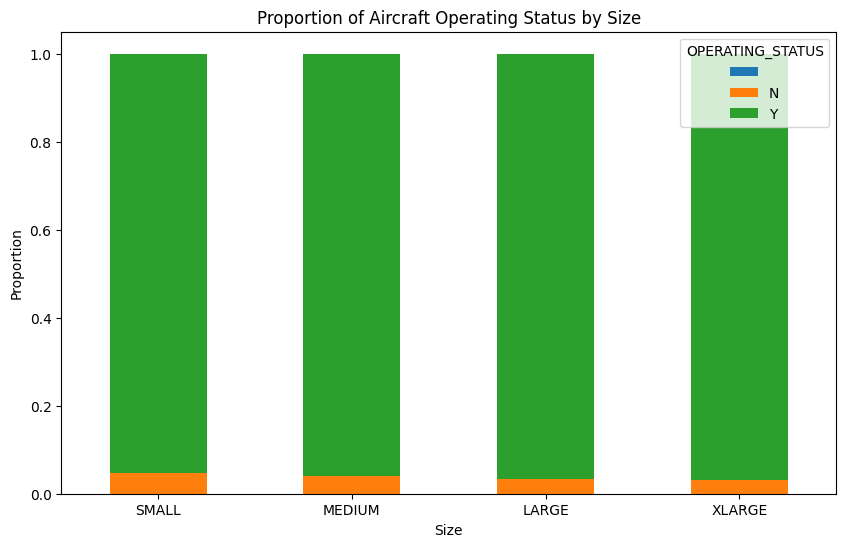

<ipython-input-57-006231de6b20>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_aircraft_status = model_inventory_clean.groupby(['SIZE', 'AIRCRAFT_STATUS']).size().unstack(fill_value=0)


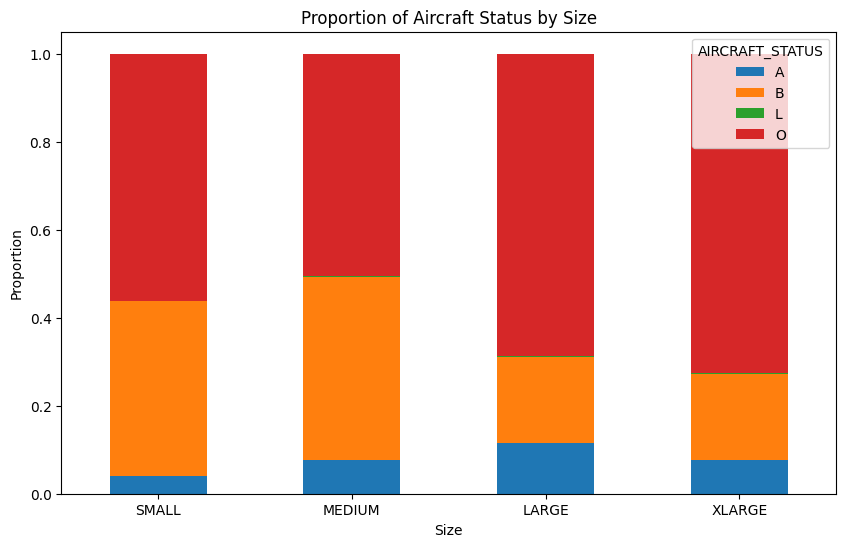

In [57]:
# Group by 'SIZE' and 'OPERATING_STATUS' and calculate proportions
size_operating_status = model_inventory_clean.groupby(['SIZE', 'OPERATING_STATUS']).size().unstack(fill_value=0)
size_operating_status_proportions = size_operating_status.div(size_operating_status.sum(axis=1), axis=0)

# Plot the proportions
size_operating_status_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Aircraft Operating Status by Size')
plt.xlabel('Size')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

# Group by 'SIZE' and 'AIRCRAFT_STATUS' and calculate proportions
size_aircraft_status = model_inventory_clean.groupby(['SIZE', 'AIRCRAFT_STATUS']).size().unstack(fill_value=0)
size_aircraft_status_proportions = size_aircraft_status.div(size_aircraft_status.sum(axis=1), axis=0)

# Plot the proportions
size_aircraft_status_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Aircraft Status by Size')
plt.xlabel('Size')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


In [77]:
model_inventory_clean[model_inventory_clean['OPERATING_STATUS'] == "Y"].shape[0]/ model_inventory_clean.shape[0]

0.9619814986488885

In [78]:
for status in model_inventory_clean['AIRCRAFT_STATUS'].unique():
    print(status, model_inventory_clean[model_inventory_clean['AIRCRAFT_STATUS'] == status].shape[0]/ model_inventory_clean.shape[0])

B 0.3010710270419535
A 0.07585948440797649
O 0.6218663090001775
L 0.0012031795498925028


Most aircraft are operational. Operating status did not substantially differ depending on the plane size, and approximatley 95% of all planes in this database are operational.

According to the BTS website, the codes are as follows: A	Capital Lease, B	Operating Lease, O	Owned. The small number of "L" entries are likely mistaken as short for "Lease" but can't be mapped to A or O. Small planes were least frequently capital leased aircraft and were typically either owned or on operating leases. Extra large planes were most frequently owned relative to other plane sizes, followed by large planes.